<a href="https://colab.research.google.com/github/iishipatel/plant-disease-identifier/blob/iishi%2FMLModel/PlantDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [4]:
PATH_IMG = Path('/content/drive/My Drive/dataset/')

In [5]:
bs = 64

In [6]:
img_data = ImageDataBunch.from_folder(path=PATH_IMG, train='train', valid='val', ds_tfms=get_transforms(), size=224, bs=bs)
img_data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (16511 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato_Bacterial_spot,Tomato_Bacterial_spot,Tomato_Bacterial_spot,Tomato_Bacterial_spot,Tomato_Bacterial_spot
Path: /content/drive/My Drive/dataset;

Valid: LabelList (4134 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Potato___Late_blight,Potato___Late_blight,Potato___Late_blight,Potato___Late_blight,Potato___Late_blight
Path: /content/drive/My Drive/dataset;

Test: None

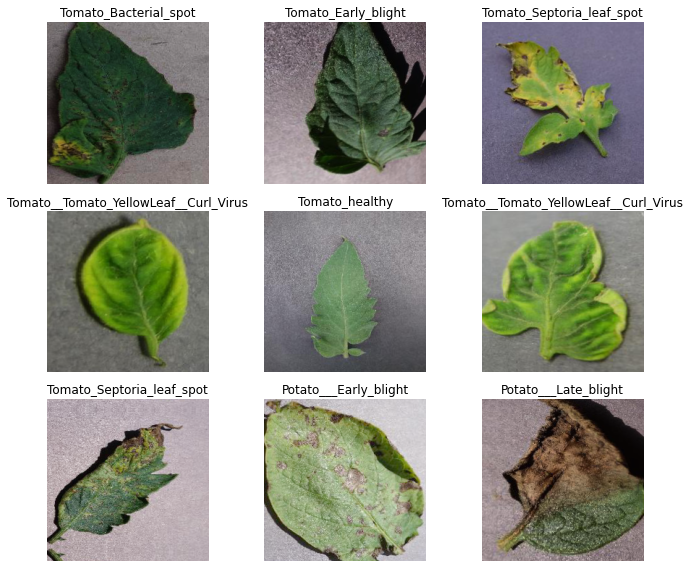

In [7]:
img_data.show_batch(rows=3, figsize=(10,8))

In [8]:
img_data.classes

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [9]:
model = cnn_learner(img_data, models.resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [10]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.631777,0.261091,0.914852,0.085148,2:11:02
1,0.332874,0.152071,0.947025,0.052975,04:12
2,0.203277,0.106193,0.967102,0.032898,03:30
3,0.129243,0.066538,0.980648,0.019352,03:31
4,0.112141,0.063309,0.981132,0.018868,03:31


In [11]:
model.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.138113,0.073357,0.979439,0.020561,03:30
1,0.110579,0.056668,0.986938,0.013062,03:29


In [12]:
model.save('model')